In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import time as timer
from sklearn.inspection import permutation_importance

In [2]:
import glob
import tensorflow as tf
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

In [3]:
# import package
# open dataset
filename = "nds - stroke.csv"
data = pd.read_csv(filename)
with pd.option_context('expand_frame_repr', False):
    print(data.head())
print("Data shape: {}".format(data.shape))

     gft  gender   age  hypertension  alcohol_intake  heart_disease ever_married      work_type Residence_type  avg_glucose_level   bmi   smoking_status  stroke  systotic bp
0   9046    Male  67.0           147             2.0              1          Yes        Private          Urban             228.69  36.6  formerly smoked       1        147.0
1  51676  Female  61.0           135             4.0              0          Yes  Self-employed          Rural             202.21   NaN     never smoked       1        135.0
2  31112    Male  80.0           115             3.0              1          Yes        Private          Rural             105.92  32.5     never smoked       1        115.0
3  60182  Female  49.0           125             2.0              0          Yes        Private          Urban             171.23  34.4           smokes       1        125.0
4   1665  Female  79.0           130             3.0              0          Yes  Self-employed          Rural             174.12 

In [4]:
data.describe()

,gft,age,hypertension,alcohol_intake,heart_disease,avg_glucose_level,bmi,stroke,systotic bp
count,3000.000000,3000.000000,3000.000000,2942.000000,3000.000000,3000.000000,2861.000000,3000.000000,100.000000
mean,36247.929667,44.404907,122.075667,1.563222,0.064333,108.026173,29.102656,0.083000,133.940000
std,21108.583152,22.703023,17.922770,1.222833,0.245387,46.588268,7.925436,0.275928,11.871211
min,77.000000,0.080000,13.000000,0.000000,0.000000,55.220000,10.300000,0.000000,111.000000
25%,17386.250000,26.000000,113.000000,1.000000,0.000000,77.802500,23.600000,0.000000,125.000000
50%,36346.500000,47.000000,124.000000,1.000000,0.000000,93.045000,28.200000,0.000000,134.500000
75%,54543.250000,62.000000,135.000000,2.000000,0.000000,116.055000,33.300000,0.000000,145.000000
max,72918.000000,82.000000,169.000000,6.000000,1.000000,271.740000,97.600000,1.000000,160.000000


In [5]:
data.drop(['systotic bp'], axis = 1) 

,gft,gender,age,hypertension,alcohol_intake,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,147,2.0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,135,4.0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,115,3.0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,125,2.0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,130,3.0,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4750,Male,78.0,148,0.0,0,Yes,Private,Urban,85.03,26.1,formerly smoked,0
2996,65127,Female,35.0,132,4.0,0,Yes,Private,Urban,80.76,28.8,smokes,0
2997,4498,Male,71.0,151,5.0,1,Yes,Private,Urban,204.98,NaN,formerly smoked,0
2998,32203,Female,57.0,140,2.0,0,Yes,Self-employed,Rural,95.36,32.4,formerly smoked,0


In [6]:
data.describe()


,gft,age,hypertension,alcohol_intake,heart_disease,avg_glucose_level,bmi,stroke,systotic bp
count,3000.000000,3000.000000,3000.000000,2942.000000,3000.000000,3000.000000,2861.000000,3000.000000,100.000000
mean,36247.929667,44.404907,122.075667,1.563222,0.064333,108.026173,29.102656,0.083000,133.940000
std,21108.583152,22.703023,17.922770,1.222833,0.245387,46.588268,7.925436,0.275928,11.871211
min,77.000000,0.080000,13.000000,0.000000,0.000000,55.220000,10.300000,0.000000,111.000000
25%,17386.250000,26.000000,113.000000,1.000000,0.000000,77.802500,23.600000,0.000000,125.000000
50%,36346.500000,47.000000,124.000000,1.000000,0.000000,93.045000,28.200000,0.000000,134.500000
75%,54543.250000,62.000000,135.000000,2.000000,0.000000,116.055000,33.300000,0.000000,145.000000
max,72918.000000,82.000000,169.000000,6.000000,1.000000,271.740000,97.600000,1.000000,160.000000


In [7]:
miss_val = data.isnull().sum()/len(data)*100
print(miss_val)
print("# Missing values in variable bmi\t\t: {:.2f}%".format(miss_val['bmi']))
print("# Missing values in variable smoking_status\t: {:.2f}%".format(miss_val['smoking_status']))
print("Data shape: {}".format(data.shape))

gft                   0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
alcohol_intake        1.933333
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   4.633333
smoking_status        0.000000
stroke                0.000000
systotic bp          96.666667
dtype: float64
# Missing values in variable bmi		: 4.63%
# Missing values in variable smoking_status	: 0.00%
Data shape: (3000, 14)


In [8]:
# Safely disable new warning with the chained assignment.
pd.options.mode.chained_assignment = None  # default='warn'
# replace missing values in variable 'bmi' with its mean
data['bmi']=data['bmi'].fillna(data['bmi'].mean())
data['alcohol_intake']=data['alcohol_intake'].fillna(data['alcohol_intake'].mean())
# remove (drop) data associated with missing values in variable 'smoking_status'
clean_data = data[data['smoking_status'].notnull()]
# drop variable 'id'
clean_data.drop(columns='gft',axis=1,inplace=True)
clean_data.drop(columns='systotic bp',axis=1,inplace=True)
clean_data.drop(columns='work_type',axis=1,inplace=True)
clean_data.drop(columns='ever_married',axis=1,inplace=True)
clean_data.drop(columns='Residence_type',axis=1,inplace=True)
# validate there's no more missing values
miss_val = clean_data.isnull().sum()/len(clean_data)*100
print(miss_val)
print("# Missing values in variable 'bmi'\t\t: {}".format(miss_val['bmi']))
print("# Missing values in variable 'smoking_status'\t: {}".format(miss_val['smoking_status']))
print("Shape of data without missing values: {}".format(clean_data.shape))

gender               0.0
age                  0.0
hypertension         0.0
alcohol_intake       0.0
heart_disease        0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64
# Missing values in variable 'bmi'		: 0.0
# Missing values in variable 'smoking_status'	: 0.0
Shape of data without missing values: (3000, 9)


In [9]:
#Changing Category to Numerical Values
#Since some variables are categorical, we have to convert them into numerical variables.
print("Unique 'gender': {}".format(clean_data['gender'].unique()))
#print("Unique 'ever_married': {}".format(clean_data['ever_married'].unique()))
#print("Unique 'work_type': {}".format(clean_data['work_type'].unique()))
#print("Unique 'Residence_type': {}".format(clean_data['Residence_type'].unique()))
print("Unique 'smoking_status': {}".format(clean_data['smoking_status'].unique()))

Unique 'gender': ['Male' 'Female']
Unique 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [10]:
# create encoder for each categorical variable
label_gender = LabelEncoder()
label_married = LabelEncoder()
label_work = LabelEncoder()
label_residence = LabelEncoder()
label_smoking = LabelEncoder()


In [11]:
clean_data['gender'] = label_gender.fit_transform(clean_data['gender'])
#clean_data['ever_married'] = label_married.fit_transform(clean_data['ever_married'])
#clean_data['work_type']= label_work.fit_transform(clean_data['work_type'])
#clean_data['Residence_type']= label_residence.fit_transform(clean_data['Residence_type'])
clean_data['smoking_status']= label_smoking.fit_transform(clean_data['smoking_status'])
with pd.option_context('expand_frame_repr', False):
    print(clean_data.head())

   gender   age  hypertension  alcohol_intake  heart_disease  avg_glucose_level        bmi  smoking_status  stroke
0       1  67.0           147             2.0              1             228.69  36.600000               1       1
1       0  61.0           135             4.0              0             202.21  29.102656               2       1
2       1  80.0           115             3.0              1             105.92  32.500000               2       1
3       0  49.0           125             2.0              0             171.23  34.400000               3       1
4       0  79.0           130             3.0              0             174.12  24.000000               2       1


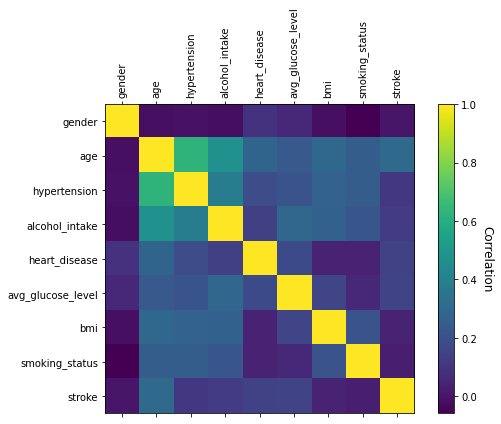

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
im = ax.matshow(clean_data.corr())
ax.set_xticks(np.arange(clean_data.shape[1]))
ax.set_yticks(np.arange(clean_data.shape[1]))
ax.set_xticklabels(clean_data.columns,rotation=90)
ax.set_yticklabels(clean_data.columns)
# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom", fontsize=12)
fig.tight_layout()
plt.show()

C:\Users\emmy1\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\emmy1\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\emmy1\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\emmy1\Anaconda3\lib\site-packages\pandas\plotting\_matpl

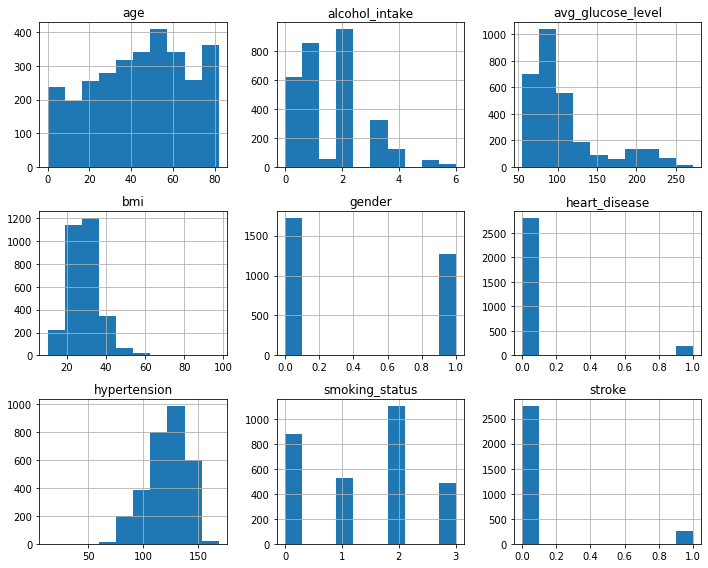

In [13]:
fig = clean_data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

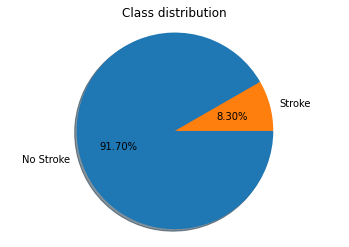

# samples associated with no stroke: 2751
# samples associated with stroke: 249


In [14]:
class_occur = clean_data['stroke'].value_counts()
class_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_occur[0]))
print("# samples associated with stroke: {}".format(class_occur[1]))

In [15]:
# create the  object with the desired sampling strategy.
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X, y = smote.fit_sample(clean_data.loc[:,clean_data.columns!='stroke'], clean_data['stroke'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (5502, 8)
Shape of y: (5502,)


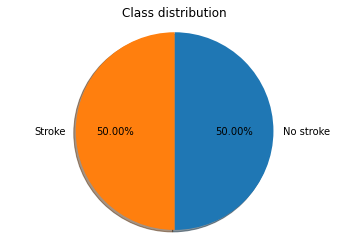

# samples associated with no stroke: 2751
# samples associated with stroke: 2751


In [16]:
_, class_counts = np.unique(y, return_counts=True)
class_names = ['No stroke', 'Stroke']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_counts[0]))
print("# samples associated with stroke: {}".format(class_counts[1]))

In [17]:
def split_train_valid_test(X,y,test_size=0.1,random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_state, stratify=y)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=test_size/(1-test_size), random_state=random_state, stratify=y_train)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

X_train, X_valid, X_test, y_train, y_valid, y_test = split_train_valid_test(X,y,test_size=0.1,random_state=42)
_, train_counts = np.unique(y_train, return_counts=True)
_, valid_counts = np.unique(y_valid, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
print("[train] # class 0: {} | # class 1: {}".format(train_counts[0],train_counts[1]))
print("[valid] # class 0: {} | # class 1: {}".format(valid_counts[0],valid_counts[1]))
print("[test]  # class 0: {} | # class 1: {}".format(test_counts[0],test_counts[1]))

[train] # class 0: 2200 | # class 1: 2200
[valid] # class 0: 275 | # class 1: 276
[test]  # class 0: 276 | # class 1: 275


In [18]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)
X_test_std = scaler.transform(X_test)

In [19]:
def calc_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # calculate the sensitivity
    sensitivity = TP / (TP + FN)    
    # calculate the specificity
    specificity = TN / (TN + FP)
    return sensitivity,specificity

In [20]:

ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train_std, y_train)
#end = timer.time()
#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_ranfor = ranfor_model.predict(X_test_std)
y_ranfor_prob = ranfor_model.predict_proba(X_test_std)



Classification report for RF: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       276
           1       0.97      0.98      0.98       275

    accuracy                           0.98       551
   macro avg       0.98      0.98      0.98       551
weighted avg       0.98      0.98      0.98       551

Confusion matrix for RF: 
[[269   7]
 [  5 270]]
Accuracy score for RF: 0.98
Precision score for RF: 0.97
Recall score for RF: 0.98
F1 score for RF: 0.98
Sensitivity score for RF: 0.98
Specitivity score for RF: 0.97
AUC score for RF: 0.99


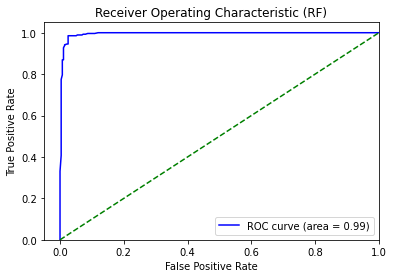

In [21]:
print("Classification report for RF: \n{}".format(classification_report(y_test,y_ranfor)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(y_test,y_ranfor)))
print("Accuracy score for RF: {:.2f}".format(accuracy_score(y_test,y_ranfor)))
# calculate precision, recall, and f1 scores
prec_ranfor = precision_score(y_test,y_ranfor)
rec_ranfor = recall_score(y_test,y_ranfor)
f1_ranfor = f1_score(y_test,y_ranfor)
print("Precision score for RF: {:.2f}".format(prec_ranfor))
print("Recall score for RF: {:.2f}".format(rec_ranfor))
print("F1 score for RF: {:.2f}".format(f1_ranfor))
# calculate sensitivity, specificity, and auc
sens_ranfor,spec_ranfor = calc_sens_spec(y_test,y_ranfor)
fpr, tpr, _ = roc_curve(y_test,  y_ranfor_prob[:,1])
auc_ranfor = roc_auc_score(y_test, y_ranfor_prob[:,1])
print("Sensitivity score for RF: {:.2f}".format(sens_ranfor))
print("Specitivity score for RF: {:.2f}".format(spec_ranfor))
print("AUC score for RF: {:.2f}".format(auc_ranfor))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ranfor)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (RF)')
ax.legend(loc="lower right")
plt.show()

In [22]:
#start = timer.time()
import xgboost as f
xgb_model = f.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_std, y_train)
#end = timer.time()
#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_xgb = xgb_model.predict(X_test_std)
y_xgb_prob = xgb_model.predict_proba(X_test_std)



C:\Users\emmy1\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Classification report for XGB: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       276
           1       0.96      0.98      0.97       275

    accuracy                           0.97       551
   macro avg       0.97      0.97      0.97       551
weighted avg       0.97      0.97      0.97       551

Confusion matrix for XGB: 
[[266  10]
 [  5 270]]
Accuracy score for XGB: 0.97
Precision score for XGB: 0.96
Recall score for XGB: 0.98
F1 score for XGB: 0.97
Sensitivity score for XGB: 0.98
Specitivity score for XGB: 0.96
AUC score for XGB: 1.00


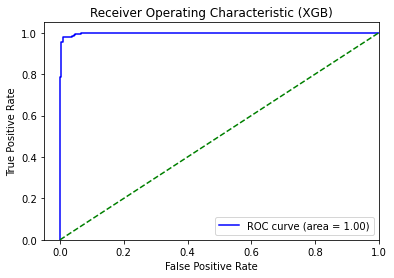

In [23]:
print("Classification report for XGB: \n{}".format(classification_report(y_test,y_xgb)))
print("Confusion matrix for XGB: \n{}".format(confusion_matrix(y_test,y_xgb)))
print("Accuracy score for XGB: {:.2f}".format(accuracy_score(y_test,y_xgb)))
# calculate precision, recall, and f1 scores
prec_xgb = precision_score(y_test,y_xgb)
rec_xgb = recall_score(y_test,y_xgb)
f1_xgb = f1_score(y_test,y_xgb)
print("Precision score for XGB: {:.2f}".format(prec_xgb))
print("Recall score for XGB: {:.2f}".format(rec_xgb))
print("F1 score for XGB: {:.2f}".format(f1_xgb))
# calculate sensitivity, specificity, and auc
sens_xgb,spec_xgb = calc_sens_spec(y_test,y_xgb)
fpr, tpr, _ = roc_curve(y_test,  y_xgb_prob[:,1])
auc_xgb = roc_auc_score(y_test, y_xgb_prob[:,1])
print("Sensitivity score for XGB: {:.2f}".format(sens_xgb))
print("Specitivity score for XGB: {:.2f}".format(spec_xgb))
print("AUC score for XGB: {:.2f}".format(auc_xgb))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_xgb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (XGB)')
ax.legend(loc="lower right")
plt.show()

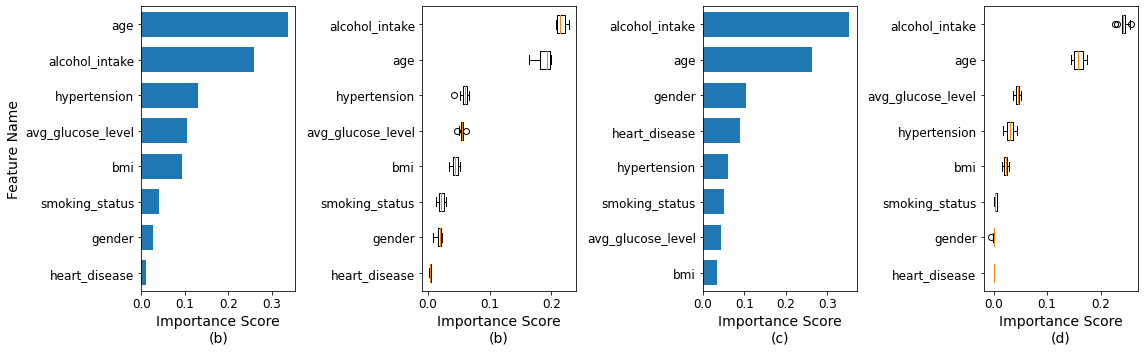

In [24]:
# feature importance from random forest

feature_names = clean_data.columns[:-1].to_numpy()
ranfor_perm_imp = permutation_importance(ranfor_model, X_test_std, y_test, n_repeats=10, random_state=42)
ranfor_perm_sort_idx = ranfor_perm_imp.importances_mean.argsort()

ranfor_tree_sort_idx = np.argsort(ranfor_model.feature_importances_)
ranfor_indices = np.arange(0, len(ranfor_model.feature_importances_)) + 0.5

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 5))
ax1.barh(ranfor_indices,ranfor_model.feature_importances_[ranfor_tree_sort_idx], height=0.7)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel("Importance Score\n(b)",fontsize=14)
ax1.set_ylabel("Feature Name",fontsize=14)
ax1.set_yticklabels(feature_names[ranfor_tree_sort_idx])
ax1.set_yticks(ranfor_indices)
ax1.set_ylim((0, len(ranfor_model.feature_importances_)))
ax2.boxplot(ranfor_perm_imp.importances[ranfor_perm_sort_idx].T,vert=False,labels=feature_names[ranfor_perm_sort_idx])
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel("Importance Score\n(b)",fontsize=14)

# feature importance from XGBoost
xgb_perm_imp =permutation_importance(xgb_model, X_test_std, y_test, n_repeats=10, random_state=42)
xgb_perm_sort_idx = xgb_perm_imp.importances_mean.argsort()

xgb_tree_sort_idx = np.argsort(xgb_model.feature_importances_)
xgb_indices = np.arange(0, len(xgb_model.feature_importances_)) + 0.5

ax3.barh(xgb_indices,xgb_model.feature_importances_[xgb_tree_sort_idx], height=0.7)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.set_xlabel("Importance Score\n(c)",fontsize=14)
ax3.set_yticklabels(feature_names[xgb_tree_sort_idx])
ax3.set_yticks(xgb_indices)
ax3.set_ylim((0, len(xgb_model.feature_importances_)))
ax4.boxplot(xgb_perm_imp.importances[xgb_perm_sort_idx].T,vert=False,labels=feature_names[xgb_perm_sort_idx])
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.set_xlabel("Importance Score\n(d)",fontsize=14)
fig.tight_layout()
fig.savefig("feature_importance.pdf", bbox_inches='tight')
plt.show()

In [25]:
#start = timer.time()
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train_std, y_train)
end = timer.time()
#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_dtree = dtree_model.predict(X_test_std)
y_dtree_prob = dtree_model.predict_proba(X_test_std)
new_input = [[0,0.82,70,0,0,77,16.2,1]]
# get prediction for new input
new_output = dtree_model.predict(new_input)
# summarize input and output
print(new_input, new_output)


[[0, 0.82, 70, 0, 0, 77, 16.2, 1]] [1]


Classification report for DT: 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       276
           1       0.95      0.97      0.96       275

    accuracy                           0.96       551
   macro avg       0.96      0.96      0.96       551
weighted avg       0.96      0.96      0.96       551

Confusion matrix for DT: 
[[263  13]
 [  9 266]]
Accuracy score for DT: 0.96
Precision score for DT: 0.95
Recall score for DT: 0.97
F1 score for DT: 0.96
Sensitivity score for DT: 0.97
Specitivity score for DT: 0.95
AUC score for DT: 0.96


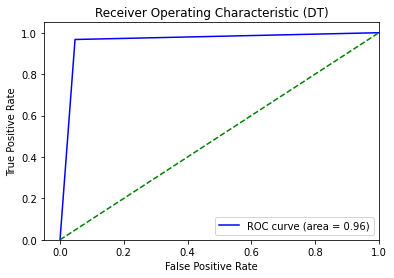

In [26]:
print("Classification report for DT: \n{}".format(classification_report(y_test,y_dtree)))
print("Confusion matrix for DT: \n{}".format(confusion_matrix(y_test,y_dtree)))
print("Accuracy score for DT: {:.2f}".format(accuracy_score(y_test,y_dtree)))
# calculate precision, recall, and f1 scores
prec_dtree = precision_score(y_test,y_dtree)
rec_dtree = recall_score(y_test,y_dtree)
f1_dtree = f1_score(y_test,y_dtree)
print("Precision score for DT: {:.2f}".format(prec_dtree))
print("Recall score for DT: {:.2f}".format(rec_dtree))
print("F1 score for DT: {:.2f}".format(f1_dtree))
# calculate sensitivity, specificity, and auc
sens_dtree,spec_dtree = calc_sens_spec(y_test,y_dtree)
fpr, tpr, _ = roc_curve(y_test,  y_dtree_prob[:,1])
auc_dtree = roc_auc_score(y_test, y_dtree_prob[:,1])
print("Sensitivity score for DT: {:.2f}".format(sens_dtree))
print("Specitivity score for DT: {:.2f}".format(spec_dtree))
print("AUC score for DT: {:.2f}".format(auc_dtree))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_dtree)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (DT)')
ax.legend(loc="lower right")
plt.show()

In [27]:
#start = timer.time()
logit_model = LogisticRegression(solver='lbfgs', random_state=42)
logit_model.fit(X_train_std, y_train)
end = timer.time()
#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_logit = logit_model.predict(X_test_std)
y_logit_prob = logit_model.predict_proba(X_test_std)
new_input = [[1,0,0,0,0,0,1,0]]
# get prediction for new input
new_output = logit_model.predict(new_input)
# summarize input and output
print(new_input, new_output)

[[1, 0, 0, 0, 0, 0, 1, 0]] [0]


Classification report for LR: 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       276
           1       0.79      0.82      0.81       275

    accuracy                           0.80       551
   macro avg       0.80      0.80      0.80       551
weighted avg       0.80      0.80      0.80       551

Confusion matrix for LR: 
[[216  60]
 [ 49 226]]
Accuracy score for LR: 0.80
Precision score for LR: 0.79
Recall score for LR: 0.82
F1 score for LR: 0.81
Sensitivity score for LR: 0.82
Specitivity score for LR: 0.78
AUC score for LR: 0.88


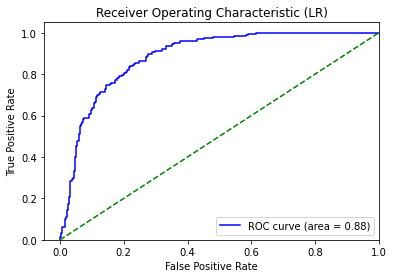

In [28]:
print("Classification report for LR: \n{}".format(classification_report(y_test,y_logit)))
print("Confusion matrix for LR: \n{}".format(confusion_matrix(y_test,y_logit)))
print("Accuracy score for LR: {:.2f}".format(accuracy_score(y_test,y_logit)))
# calculate precision, recall, and f1 scores
prec_logit = precision_score(y_test,y_logit)
rec_logit = recall_score(y_test,y_logit)
f1_logit = f1_score(y_test,y_logit)
print("Precision score for LR: {:.2f}".format(prec_logit))
print("Recall score for LR: {:.2f}".format(rec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))
# calculate sensitivity, specificity, and auc
sens_logit,spec_logit = calc_sens_spec(y_test,y_logit)
fpr, tpr, _ = roc_curve(y_test,  y_logit_prob[:,1])
auc_logit = roc_auc_score(y_test, y_logit_prob[:,1])
print("Sensitivity score for LR: {:.2f}".format(sens_logit))
print("Specitivity score for LR: {:.2f}".format(spec_logit))
print("AUC score for LR: {:.2f}".format(auc_logit))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_logit)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (LR)')
ax.legend(loc="lower right")
plt.show()